## Model

In [33]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge

import warnings
warnings.filterwarnings('ignore')

In [34]:
all_fe = pd.read_csv('features/all_feaut.csv', index_col='Unnamed: 0')
df_all = pd.read_csv('train_data.csv', index_col='Unnamed: 0')
df_all['date']=pd.to_datetime(df_all['date'])
start_test = pd.datetime(2020, 11, 1)
idx_train, idx_test =  df_all[(df_all.date<start_test ) & (df_all.date>=pd.datetime(2020, 10, 15))].index, df_all[df_all.date>=start_test].index
#idx_train, idx_test =  df_all[(df_all.date<start_test )].index, df_all[(df_all.date>=start_test)&(df_all.date<pd.datetime(2020, 11, 15))].index


#idx_train, idx_test =  df_all[(df_all.date<start_test )].index, df_all[df_all.date>=start_test].index

feat_labels = df_all.columns[2:-1]
y=df_all['response']

#all_fe=pd.concat([all_fe, pd.get_dummies(df_all['county'], prefix=['county'])], axis=1)
#all_fe=pd.concat([all_fe, df_all['county']], axis=1)
#all_fe=pd.concat([all_fe, df_all['county'].astype(str).str[:2].astype(int)], axis=1)

all_fe=pd.concat([all_fe, pd.get_dummies(df_all['county'].astype(str).str[:2].astype(int), prefix=['county'])], axis=1)




X_train = all_fe.loc[idx_train].dropna()
y_train= y.reindex(X_train.index)

X_test = all_fe.loc[idx_test]
y_test= y.reindex(X_test.index)


In [35]:
l1_l =[]
alpha_l=[]
sco_l =[]
for alpha in np.linspace(5,15,100 ):
#for alpha in range(0.1,30):


    for l1 in [0.1*i for i in range(10)]:

        model=make_pipeline(StandardScaler(),  ElasticNet(random_state=0, alpha=alpha, l1_ratio=1))
        y_pred = model.fit(X_train,y_train ).predict(X_test)
        scr = np.mean(np.abs(np.log(1 + y_pred) - np.log(1 + y_test)))
        
        alpha_l.append(alpha)
        l1_l.append(l1)
        sco_l.append(scr)
        print('alpha {} , l1 {}, loss {}'.format(alpha,l1,scr))


alpha 5.0 , l1 0.0, loss 0.27250448228499435
alpha 5.0 , l1 0.1, loss 0.27250448228499435
alpha 5.0 , l1 0.2, loss 0.27250448228499435
alpha 5.0 , l1 0.30000000000000004, loss 0.27250448228499435
alpha 5.0 , l1 0.4, loss 0.27250448228499435
alpha 5.0 , l1 0.5, loss 0.27250448228499435
alpha 5.0 , l1 0.6000000000000001, loss 0.27250448228499435
alpha 5.0 , l1 0.7000000000000001, loss 0.27250448228499435
alpha 5.0 , l1 0.8, loss 0.27250448228499435
alpha 5.0 , l1 0.9, loss 0.27250448228499435
alpha 5.101010101010101 , l1 0.0, loss 0.27153877251196995
alpha 5.101010101010101 , l1 0.1, loss 0.27153877251196995
alpha 5.101010101010101 , l1 0.2, loss 0.27153877251196995
alpha 5.101010101010101 , l1 0.30000000000000004, loss 0.27153877251196995
alpha 5.101010101010101 , l1 0.4, loss 0.27153877251196995
alpha 5.101010101010101 , l1 0.5, loss 0.27153877251196995
alpha 5.101010101010101 , l1 0.6000000000000001, loss 0.27153877251196995
alpha 5.101010101010101 , l1 0.7000000000000001, loss 0.2715

alpha 6.313131313131313 , l1 0.9, loss 0.26115228864701134
alpha 6.414141414141414 , l1 0.0, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.1, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.2, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.30000000000000004, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.4, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.5, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.6000000000000001, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.7000000000000001, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.8, loss 0.2603956766158891
alpha 6.414141414141414 , l1 0.9, loss 0.2603956766158891
alpha 6.515151515151516 , l1 0.0, loss 0.2596600300957631
alpha 6.515151515151516 , l1 0.1, loss 0.2596600300957631
alpha 6.515151515151516 , l1 0.2, loss 0.2596600300957631
alpha 6.515151515151516 , l1 0.30000000000000004, loss 0.2596600300957631
alpha 6.515151515151516 , l1 0.4, loss 0.2596600300957631
alpha 6.5

alpha 7.727272727272727 , l1 0.4, loss 0.25178293978182237
alpha 7.727272727272727 , l1 0.5, loss 0.25178293978182237
alpha 7.727272727272727 , l1 0.6000000000000001, loss 0.25178293978182237
alpha 7.727272727272727 , l1 0.7000000000000001, loss 0.25178293978182237
alpha 7.727272727272727 , l1 0.8, loss 0.25178293978182237
alpha 7.727272727272727 , l1 0.9, loss 0.25178293978182237
alpha 7.828282828282829 , l1 0.0, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.1, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.2, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.30000000000000004, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.4, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.5, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.6000000000000001, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.7000000000000001, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.8, loss 0.2512247474636474
alpha 7.828282828282829 , l1 0.9, loss 0.2512247

alpha 9.141414141414142 , l1 0.7000000000000001, loss 0.24598938215363142
alpha 9.141414141414142 , l1 0.8, loss 0.24598938215363142
alpha 9.141414141414142 , l1 0.9, loss 0.24598938215363142
alpha 9.242424242424242 , l1 0.0, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.1, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.2, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.30000000000000004, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.4, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.5, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.6000000000000001, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.7000000000000001, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.8, loss 0.24575911567771244
alpha 9.242424242424242 , l1 0.9, loss 0.24575911567771244
alpha 9.343434343434343 , l1 0.0, loss 0.24554855886402435
alpha 9.343434343434343 , l1 0.1, loss 0.24554855886402435
alpha 9.343434343434343 , l1 0.2, loss 0.2455485588640

alpha 10.656565656565657 , l1 0.5, loss 0.24556765609828857
alpha 10.656565656565657 , l1 0.6000000000000001, loss 0.24556765609828857
alpha 10.656565656565657 , l1 0.7000000000000001, loss 0.24556765609828857
alpha 10.656565656565657 , l1 0.8, loss 0.24556765609828857
alpha 10.656565656565657 , l1 0.9, loss 0.24556765609828857
alpha 10.757575757575758 , l1 0.0, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.1, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.2, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.30000000000000004, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.4, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.5, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.6000000000000001, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.7000000000000001, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.8, loss 0.24577078990862902
alpha 10.757575757575758 , l1 0.9, loss 0.24577078990862902
alpha 10.858585858585858

alpha 11.969696969696969 , l1 0.6000000000000001, loss 0.2512476795226629
alpha 11.969696969696969 , l1 0.7000000000000001, loss 0.2512476795226629
alpha 11.969696969696969 , l1 0.8, loss 0.2512476795226629
alpha 11.969696969696969 , l1 0.9, loss 0.2512476795226629
alpha 12.070707070707071 , l1 0.0, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.1, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.2, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.30000000000000004, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.4, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.5, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.6000000000000001, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.7000000000000001, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.8, loss 0.2519335494782366
alpha 12.070707070707071 , l1 0.9, loss 0.2519335494782366
alpha 12.171717171717171 , l1 0.0, loss 0.2526525870069425
alpha 12.171717171717171 , l1 0.1, loss

alpha 13.383838383838384 , l1 0.9, loss 0.2640953387793742
alpha 13.484848484848484 , l1 0.0, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.1, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.2, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.30000000000000004, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.4, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.5, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.6000000000000001, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.7000000000000001, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.8, loss 0.2652655490942807
alpha 13.484848484848484 , l1 0.9, loss 0.2652655490942807
alpha 13.585858585858587 , l1 0.0, loss 0.2664602229880808
alpha 13.585858585858587 , l1 0.1, loss 0.2664602229880808
alpha 13.585858585858587 , l1 0.2, loss 0.2664602229880808
alpha 13.585858585858587 , l1 0.30000000000000004, loss 0.2664602229880808
alpha 13.585858585858587 , l1 0.4, loss 0.26646022298

alpha 14.8989898989899 , l1 0.1, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.2, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.30000000000000004, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.4, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.5, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.6000000000000001, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.7000000000000001, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.8, loss 0.2860711058138332
alpha 14.8989898989899 , l1 0.9, loss 0.2860711058138332
alpha 15.0 , l1 0.0, loss 0.2878587844315661
alpha 15.0 , l1 0.1, loss 0.2878587844315661
alpha 15.0 , l1 0.2, loss 0.2878587844315661
alpha 15.0 , l1 0.30000000000000004, loss 0.2878587844315661
alpha 15.0 , l1 0.4, loss 0.2878587844315661
alpha 15.0 , l1 0.5, loss 0.2878587844315661
alpha 15.0 , l1 0.6000000000000001, loss 0.2878587844315661
alpha 15.0 , l1 0.7000000000000001, loss 0.2878587844315661
alpha 15.0 , l1 0.8, loss 0.2878587

In [36]:
all_param=pd.DataFrame({'alpha' : alpha_l , 'l1' :l1_l, 'scr' :sco_l })
all_param.loc[all_param['scr'].idxmin()]

alpha    9.949495
l1       0.000000
scr      0.244887
Name: 490, dtype: float64

In [37]:
model=make_pipeline(StandardScaler(),  ElasticNet(random_state=0, alpha=9.949495, l1_ratio=1))

y_pred = model.fit(X_train,y_train ).predict(X_test)
scr = np.mean(np.abs(np.log(1 + y_pred) - np.log(1 + y_test)))
print(scr)


0.2448868346361729


In [38]:
len(X_train.columns)

59

In [48]:
#X_train.columns[np.abs(model['elasticnet'].coef_)>1e-8]

TypeError: 'Pipeline' object is not subscriptable

In [40]:
res = pd.concat([pd.DataFrame({'pred' : y_pred, 'true' : y_test}),df_all.loc[idx_test,:][['county', 'date']]],axis=1)

res['loss'] =np.abs(np.log(1 + y_pred) - np.log(1 + y_test))



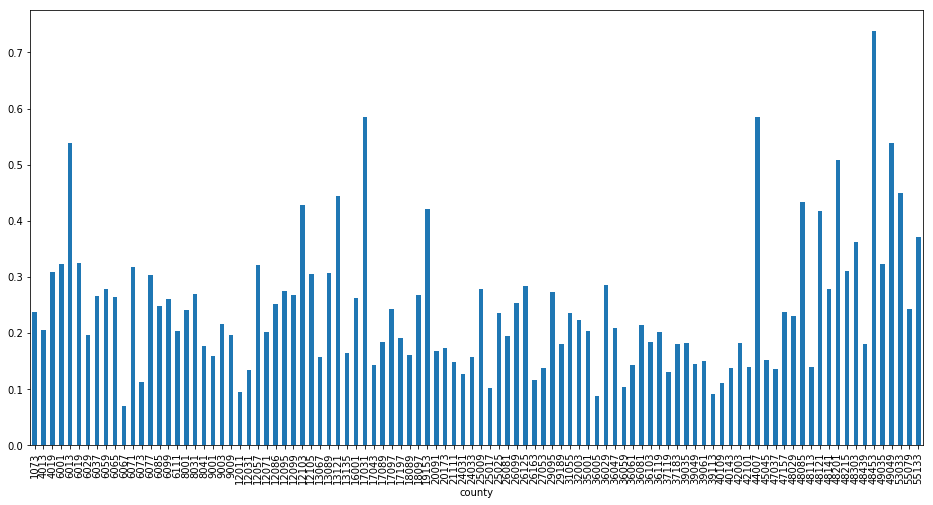

In [41]:
res.groupby('county')['loss'].mean().plot(kind='bar', figsize=(16,8))

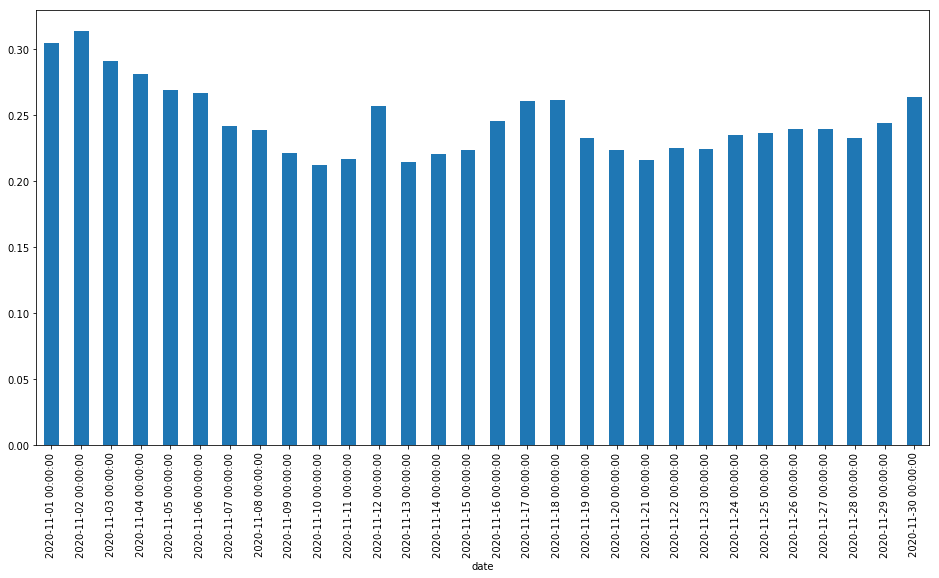

In [42]:
res.groupby('date')['loss'].mean().plot(kind='bar', figsize=(16,8))

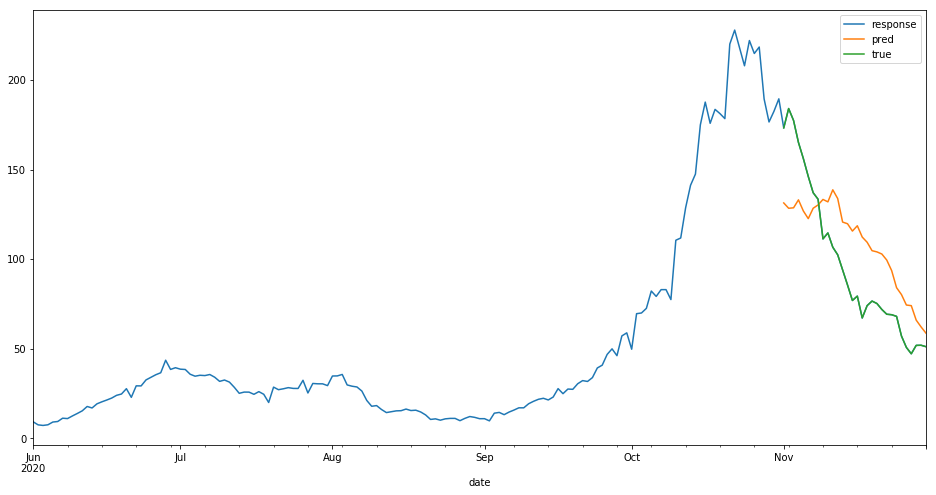

In [43]:
county=48141
ts = df_all.loc[df_all.county==county, ['response', 'date']]

ts.merge(res[res.county==county], how='left').set_index('date')[['response', 'pred', 'true']].plot(figsize=(16,8))


In [44]:
county=17031
ts = df_all.loc[df_all.county==county, ['response', 'date']]

ts.merge(res[res.county==county], how='left').set_index('date')[['response', 'pred', 'true']].iloc[-40:]

,response,pred,true
date,,,
2020-10-22,59.159598,NaN,NaN
2020-10-23,66.185632,NaN,NaN
2020-10-24,70.077273,NaN,NaN
2020-10-25,70.898318,NaN,NaN
2020-10-26,75.918895,NaN,NaN
2020-10-27,81.108674,NaN,NaN
2020-10-28,84.007295,NaN,NaN
2020-10-29,88.040400,NaN,NaN
2020-10-30,89.860012,NaN,NaN


In [45]:
ts

,response,date
38,6.560036,2020-06-01
138,6.288204,2020-06-02
238,6.304847,2020-06-03
338,6.105133,2020-06-04
438,6.385287,2020-06-05
...,...,...
17838,67.486545,2020-11-26
17938,66.243882,2020-11-27
18038,65.594813,2020-11-28
18138,64.923554,2020-11-29


In [46]:
county = 1073
res[res.county==county].reindex









<bound method DataFrame.reindex of             pred       true  county       date      loss
15301  37.206426  41.800334    1073 2020-11-01  0.113542
15401  43.675465  41.409879    1073 2020-11-02  0.052043
15501  43.443233  47.461926    1073 2020-11-03  0.086566
15601  45.456638  49.175588    1073 2020-11-04  0.077009
15701  44.393874  51.474931    1073 2020-11-05  0.144958
15801  43.381022  51.236320    1073 2020-11-06  0.162966
15901  43.955961  53.101826    1073 2020-11-07  0.185185
16001  46.590120  52.798139    1073 2020-11-08  0.122614
16101  41.992051  53.795967    1073 2020-11-09  0.242601
16201  45.747635  56.897912    1073 2020-11-10  0.213918
16301  45.133373  56.615917    1073 2020-11-11  0.222262
16401  42.671176  56.897912    1073 2020-11-12  0.281993
16501  43.818427  50.281876    1073 2020-11-13  0.134718
16601  42.251044  49.609426    1073 2020-11-14  0.157116
16701  43.726416  52.060613    1073 2020-11-15  0.170871
16801  47.779834  53.015058    1073 2020-11-16  0.101

In [47]:
res.groupby('county')['loss'].mean()[55133]

0.371358138936617